# Принятие решений в бизнесе

**Контекст**

Заказчик: крупный интернет-магазин. Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.

Необходимо приоритизировать эти гипотезы, запустить A/B-тест и проанализировать его результаты. 

**План работы:**

**Часть 1. Приоритизация гипотез.**

Файл `/datasets/hypothesis.csv` содержит 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами 
- Reach,
- Impact,
- Confidence,
- Effort.

 **Задачи:**

* Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

**Часть 2. Анализ A/B-теста**

В результате проведения A/B-теста получены результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

**Задача**

Проанализировать A/B-тест:
* Построить график кумулятивной выручки по группам.
* Построить график кумулятивного среднего чека по группам.
* Построить график относительного изменения кумулятивного среднего чека группы B к группе A.
* Построить график кумулятивного среднего количества заказов на посетителя по группам.
* Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.


* Построить точечный график количества заказов по пользователям.
* Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.


* Построить точечный график стоимостей заказов. 
* Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.


* Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 


* Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 


* По каждому пункту сделать выводы и предположения.


* Принять решение по результатам теста и объяснить его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

## Обработка данных

In [1]:
#Загружаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import datetime as dt
import seaborn as sns
import warnings
import numpy as np
import scipy.stats as stats
import matplotlib.ticker as ticker

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format
sns.set_palette('pastel')
register_matplotlib_converters()
pd.set_option('max_colwidth', 200)

### Чтение и изучение данных

In [2]:
# Чтение файла с данными о гипотезах
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv') # в практикуме
except:
    hypothesis = pd.read_csv('hypothesis.csv') # локально
print(hypothesis.info())
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
# Чтение файла с данными о заказах
try:
    orders = pd.read_csv('/datasets/orders.csv') # в практикуме
except:
    orders = pd.read_csv('orders.csv') # локально
print(orders.info())
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [4]:
# Чтение файла с данными о посетителях
try:
    visitors = pd.read_csv('/datasets/visitors.csv') # в практикуме
except:
    visitors = pd.read_csv('visitors.csv') # локально
print(visitors.info())
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Описание данных

Данные для первой части:

Файл `/datasets/hypothesis.csv` 

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части:

Файл `/datasets/orders.csv`

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста



### Предобработка данных

Исправим:
- названия столбцов (в первом датасете исправим заглавные буквы на прописные);
- типы столбцов с датой.

Проверим:
- данные на наличие дубликатов и пропусков;
- совпадает ли дата начала и конца теста в датасетах `orders` и `visitors`;
- качество разделения пользователей на группы.

In [5]:
# Исправляем написание названий столбцов
hypothesis.columns = hypothesis.columns.str.lower()

In [6]:
# Исправляем типы данных с датой
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Названия столбцов и типы данных исправлены.

Выполним проверку на дубликаты и пропуски:

In [7]:
#Проверка на наличие полных дубликатов и пропусков
def duplicate_and_null_check(data): 
    print('Количество полных дубликатов: ', data.duplicated().sum())
    print('Количество пропусков: \n', data.isna().sum())
    return

In [8]:
duplicate_and_null_check(hypothesis)

Количество полных дубликатов:  0
Количество пропусков: 
 hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64


In [9]:
duplicate_and_null_check(orders)

Количество полных дубликатов:  0
Количество пропусков: 
 transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


In [10]:
duplicate_and_null_check(visitors)

Количество полных дубликатов:  0
Количество пропусков: 
 date        0
group       0
visitors    0
dtype: int64


Дубликатов и пропусков в данных нет. 

Проверим даты начала и конца проведения теста:

In [11]:
print(f'orders:\nНачальная дата: {orders.date.min()}, конечная дата: {orders.date.max()}')
print(f'visitors:\nНачальная дата: {visitors.date.min()}, конечная дата: {visitors.date.max()}')

orders:
Начальная дата: 2019-08-01 00:00:00, конечная дата: 2019-08-31 00:00:00
visitors:
Начальная дата: 2019-08-01 00:00:00, конечная дата: 2019-08-31 00:00:00


Даты начала и конца в двух датафреймах совпадают, проверим качество разделения данных на группы:

In [12]:
duplicate_users = (orders[orders['group'] == 'A']
                   .merge(orders[orders['group'] == 'B'], on='visitorId', how='inner')['visitorId']
                  )
print(f'Количество уникальных пользователей, которые нахоятся в двух группах одновременно {duplicate_users.nunique()}')
print(f'Количество заказов, совершенных неверно распределенными пользователями: {duplicate_users.count()}')
print('Процент данных, подлежащих удалению: ', '{:.2%}'.format(duplicate_users.count() / orders.shape[0]))

Количество уникальных пользователей, которые нахоятся в двух группах одновременно 58
Количество заказов, совершенных неверно распределенными пользователями: 183
Процент данных, подлежащих удалению:  15.29%


Получили 58 пользователей, которые входят в обе группы, на этих пользователей приходится 183 заказа.

Для дропа 15,29% довольно большой процент. Однако в разрезе А/В теста нам больше важен другой показатель - объем выборки для проведения теста.

К сожалению у нас отсутствуют данные об ID пользователей которые посещали сайт, и мы не сможем отделить эти 58 пользователей из посетителей и заказов одновременно. 

Будем считать что нам хватает наблюдений для проведения теста и пользователи, входящие в обе группы не сильно влияют на показатели выборки.

Однако необходимо сообщить инженерам о недостатке данных по пользователям в датафрейме visitors, а так же о том, что пользователи некорректно распределяются на группы. 

## Приоритезация гипотез

**Часть 1. Приоритизация гипотез.**

Файл `/datasets/hypothesis.csv` содержит 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами 
- Reach,
- Impact,
- Confidence,
- Effort.

 **Задачи:**

* Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Примените фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

Рассчитаем показатель **ICE** (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») 

In [13]:
# Рассчитаем параметр ICE
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
# Добавим рейтинг гипотез
hypothesis = hypothesis.sort_values(by='ICE', ascending=False)
hypothesis['ICE_rate'] = np.arange(1, len(hypothesis)+1)
# Выведем отсортированный по параметру ICE список гипотез
pd.set_option('max_colwidth', 200)
hypothesis[['hypothesis', 'ICE', 'ICE_rate']] #Был отсортирован ранее

,hypothesis,ICE,ICE_rate
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,1
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,2
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,4
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,5
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,6
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,7
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,9


Посмотрим как изменится порядок гипотез, если мы будем учитывать охват предполагаемых изменений.

Расчитаем показатель **RICE** и так же добавим рейтинг:

In [14]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

# Добавим рейтинг гипотез
hypothesis = hypothesis.sort_values(by='RICE', ascending=False)
hypothesis['RICE_rate'] = np.arange(1, len(hypothesis)+1)

# Выведем отсортированный по параметру ICE список гипотез
hypothesis[['hypothesis', 'RICE', 'RICE_rate']] #Был отсортирован ранее

,hypothesis,RICE,RICE_rate
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00,1
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00,2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00,4
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,5
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00,7
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00,9


Порядок приоритета изменился, сравним приоритеты


In [15]:
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE,ICE_rate,RICE,RICE_rate
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,3,112.00,1
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,5,56.00,2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,2,40.00,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,4,40.00,4
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,1,16.20,5
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,8,9.00,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,6,4.00,7
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,7,4.00,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,9,3.00,9


Рейтинг гипотез разный, в зависимости от того учитываем мы охват или нет.

Например гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" без учета охвата в рейтинге ICE находится на 3 месте по приоритету, но т.к. эта гипотеза имеет самый большой охват в рейтинге по критерию RICE эта гипотеза вырывается на первое место, при чем с весьма значительным отрывом. 

Первая пятерка гипотез сохранилась, но в другом поряке. В тройке лидеров сохранилась только гипотеза "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"  

Гипотеза "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей" при любом расчете оказывается наименее приоритетной (имеет самые низкие показатели по критериям оценивания).

Я бы рекомендовала в первую очередь тестировать гипотезу "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" так как эта гипотеза имеет хороший ретинг как с учетом охвата пользователей, так и без него.

## A/B-тест
**Часть 2. Анализ A/B-теста**

В результате проведения A/B-теста получены результаты, которые описаны в файлах */datasets/orders.csv* и */datasets/visitors.csv.*

Рассчитаем кумулятивные метрики и статистическую значимость для определения наличия различий между двумя группами по среднему количеству заказов на посетителя и среднему чеку заказа.

### Кумулятивная выручка по группам

Построим график кумулятивной выручки по группам.

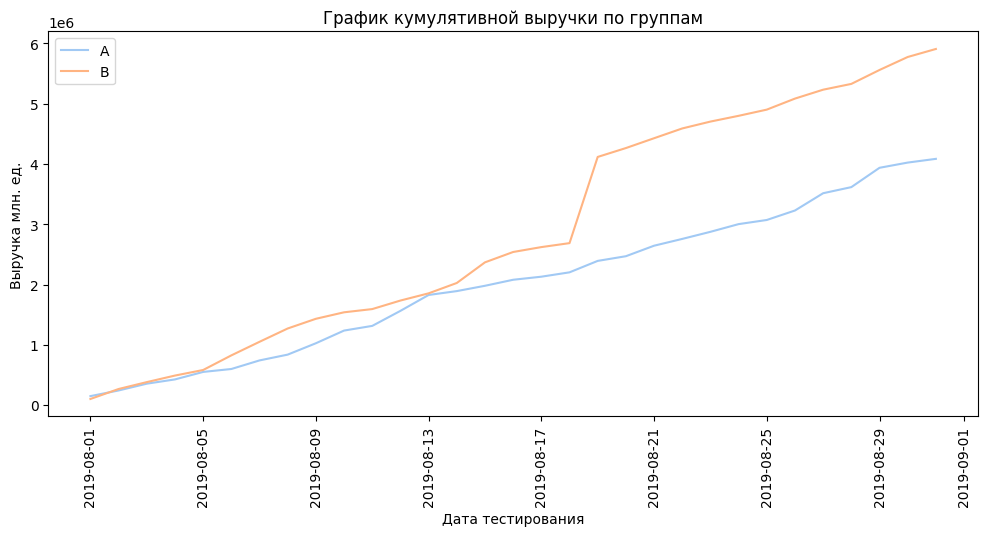

In [16]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()

plt.tick_params(axis='x', labelrotation = 90) # поворот подписей
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата тестирования') 
plt.ylabel('Выручка млн. ед.');   

Выручка в группе B со второго дня начала теста держалась незначительно выше выручки группы A. Однако 19 августа произошел резкий скачок значений. Возможно имеет место аномально большой по стоимости заказ или аномальное количество заказов. 

Предварительно - группа B имеет стабильно лучшие показатели выручки, чем группа A.

### Кумулятивный средний чек по группам

Построим график кумулятивного среднего чека по группам.

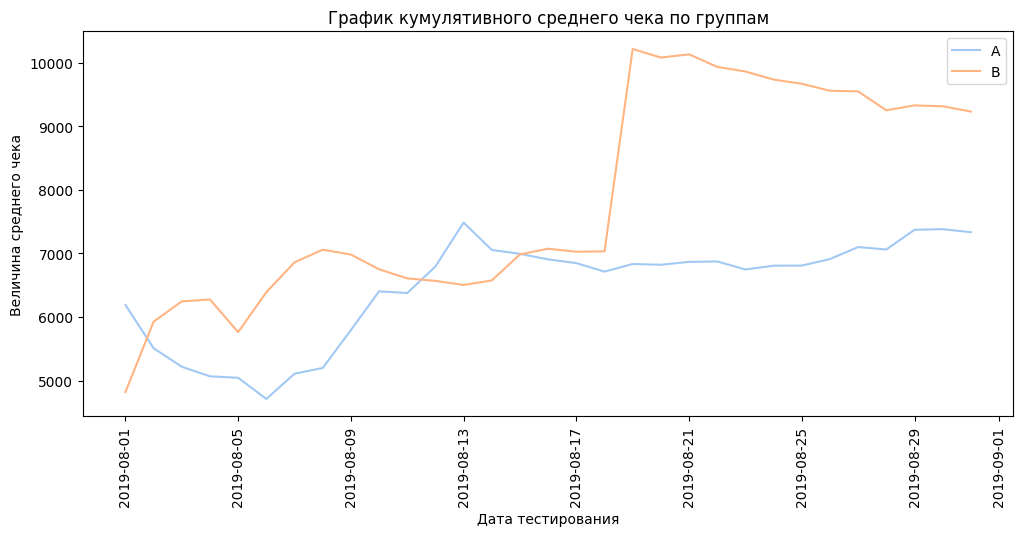

In [17]:
plt.figure(figsize=(12, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.tick_params(axis='x', labelrotation = 90)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата тестирования') 
plt.ylabel('Величина среднего чека');# поворот подписей

А вот по оценке среднего чека группа B не так стабильно в лидерах. Аномалия 19 августа вызвала скачок, однако после скачка показатели среднего чека падают. По этому графику уже видно, что группа B может иметь наоборот плохие показатели.

### График относительного изменения кумулятивного среднего чека

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

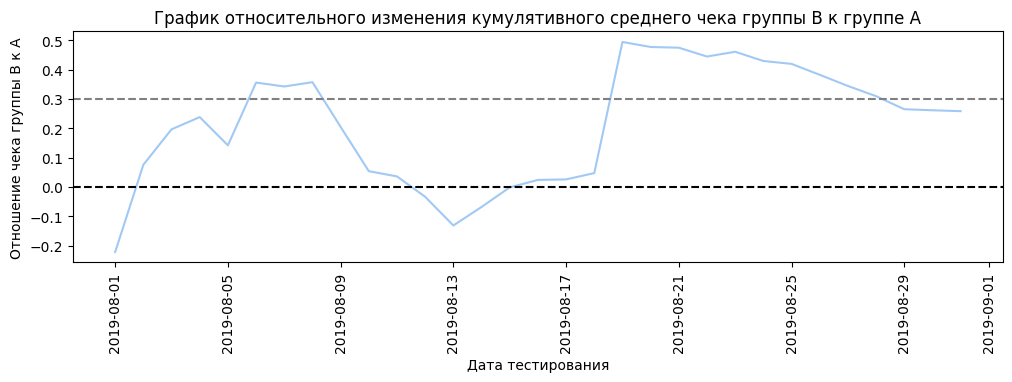

In [18]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 3))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.3, color='grey', linestyle='--')
plt.tick_params(axis='x', labelrotation = 90)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата тестирования') 
plt.ylabel('Отношение чека группы В к А');

Первую неделю средний чек группы B рос, но к концу второй недели средний чек стал хуже, чем у контрольной группы. Однако аномальный заказ 19 августа исправил ситуацию и средний чек снова стал больше, чем у контрольной группы. 

Тем не менее, к концу теста средний чек второй группы продолжает падать.

### Кумулятивное среднее количества заказов на посетителя

Построим график кумулятивного среднего количества заказов на посетителя по группам.

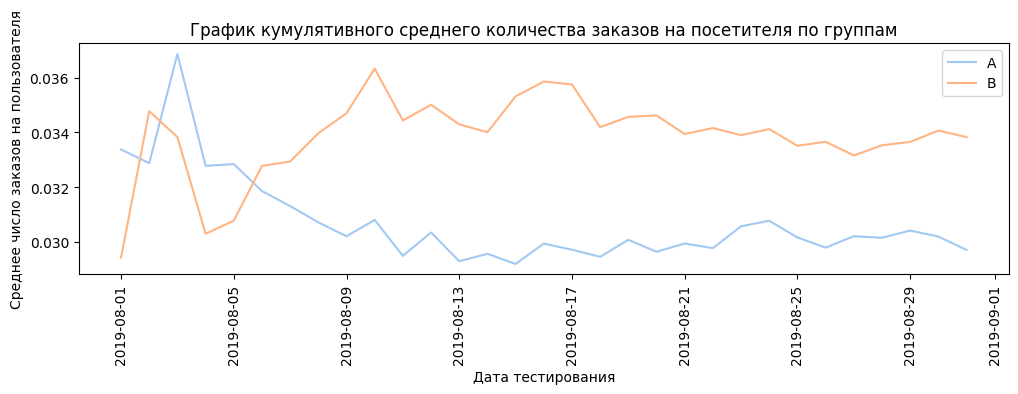

In [19]:
# считаем кумулятивное среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(12, 3))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.tick_params(axis='x', labelrotation = 90)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата тестирования') 
plt.ylabel('Среднее число заказов на пользователя');

Значения колеблются от 3% до 3.6% - довольно незначительно. Однако уже через неделю после начала теста стабильно среднее количество заказов на посетителя у группы B выше, чем у группы А. С третьей недели показатели выровнялись и практически перестали колебаться.

### График относительного изменения кумулятивного количества заказов

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

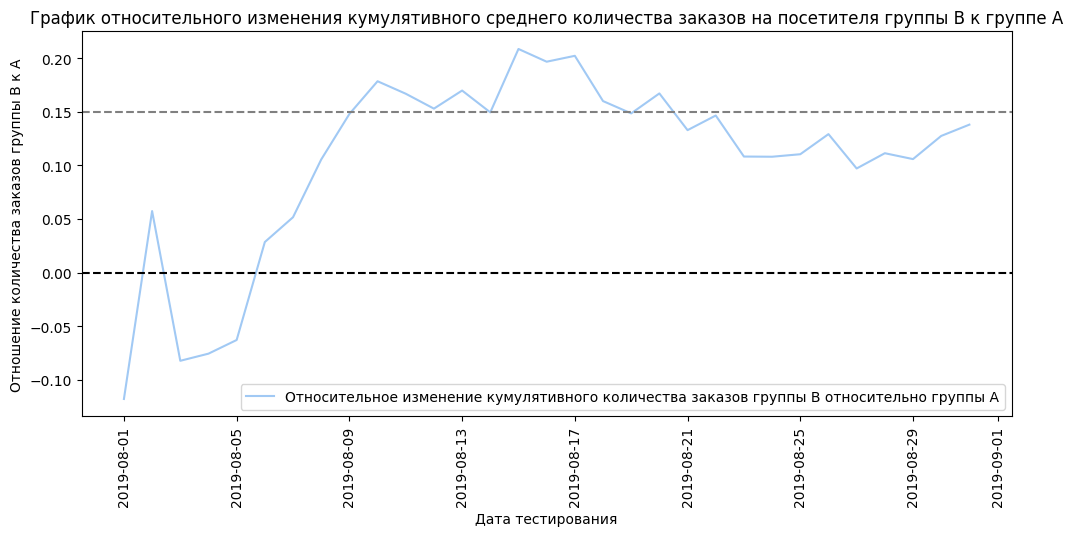

In [20]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],
                                                                           left_on='date',
                                                                           right_on='date',
                                                                           how='left',
                                                                           suffixes=['A', 'B'])

plt.figure(figsize=(12, 5))

plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label="Относительное изменение кумулятивного количества заказов группы B относительно группы A")

plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.tick_params(axis='x', labelrotation = 90)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата тестирования') 
plt.ylabel('Отношение количества заказов группы В к А');

Со второй недели среднее количество заказов на посетителя группы B стало выше, чем в группе А.

Возможно в первую неделю происходили отладочные процессы теста или "привыкание" к новому функционалу, т.к. значения группы В резко то падали, то поднимались относительно группы А.

### График количества заказов по пользователям
Построим точечный график количества заказов по пользователям.

In [21]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


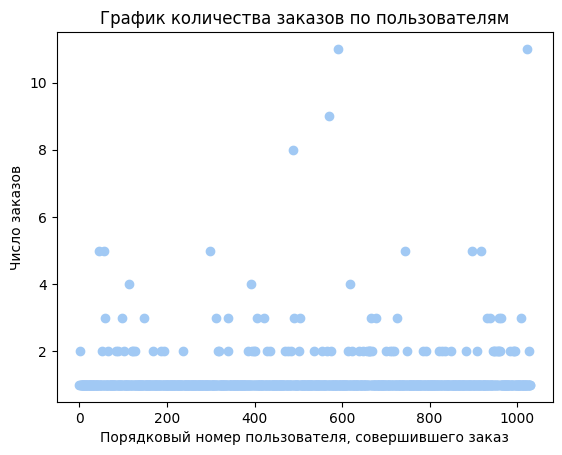

In [22]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.xlabel('Порядковый номер пользователя, совершившего заказ') 
plt.ylabel('Число заказов');

Пользователей, сделавших более 2 заказов не так много. Вероятно, пользователи сделавшие больше 2 заказов будут считаться аномальными и их следует исключить из выборки.

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [23]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


Действительно, не более 5% совершили более 2ух заказов, и не более 1% совершили больше 4 заказов.

**В дальнейшем отсеем пользователей, которые совершили 3 и более заказов. Ориентируемся на 2 персентиль.**

In [24]:
orders_95 = np.percentile(ordersByUsers['orders'], 95)

### График стоимости заказов

Построим точечный график стоимостей заказов.

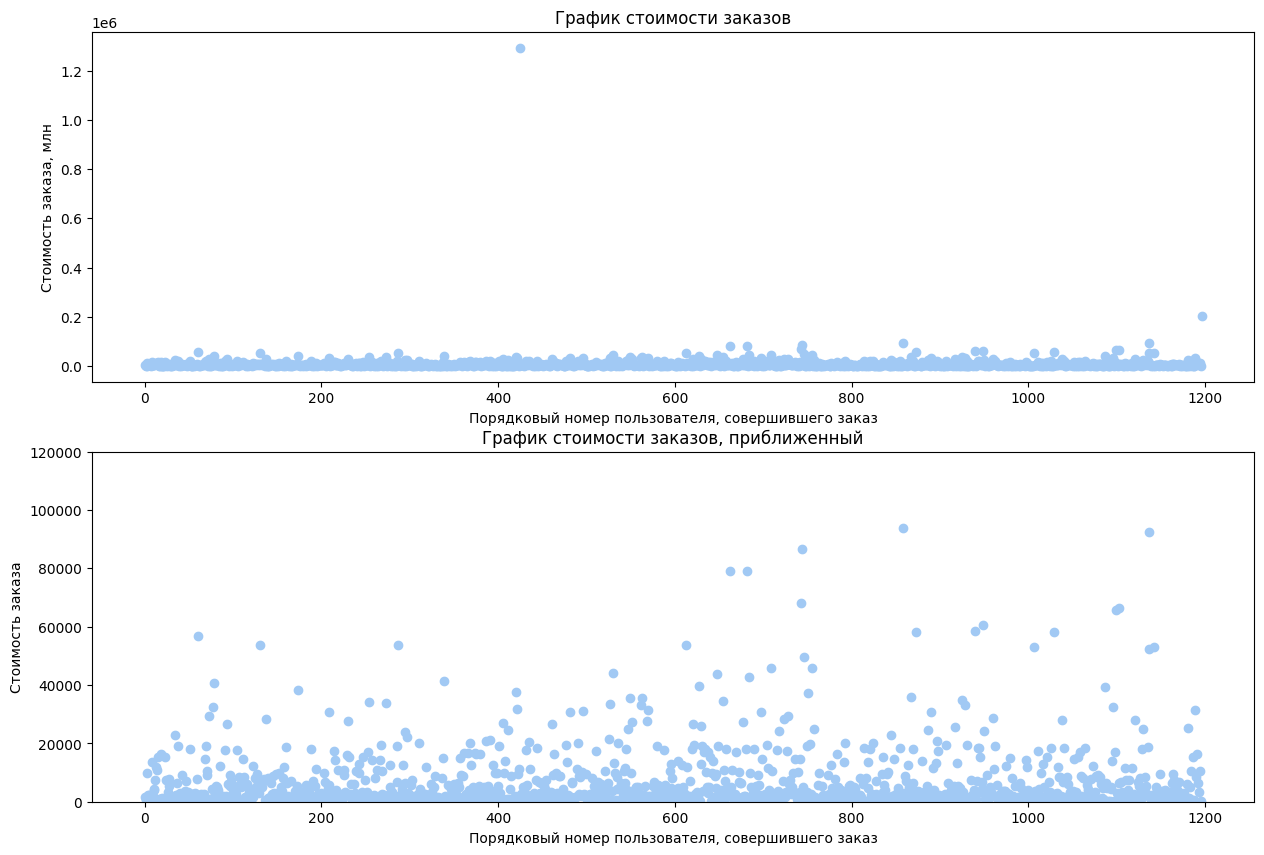

In [25]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(15, 10))

plt.subplot(211)
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимости заказов')
plt.xlabel('Порядковый номер пользователя, совершившего заказ') 
plt.ylabel('Стоимость заказа, млн')

plt.subplot(212)
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 120000)
plt.title('График стоимости заказов, приближенный')
plt.xlabel('Порядковый номер пользователя, совершившего заказ') 
plt.ylabel('Стоимость заказа');

Имеется один резко выбивающийся заказ на 1.2млн. и один в 200тыс., большинство остальных заказов по стоимости визуально находятся в пределах 30 тысяч.

Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [26]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Только у 5% пользователей сумма заказа превышает 28тыс. и только у 1% пользователей превышает 58тыс.

**В дальнейшем отсеем пользоваталей, у которых сумма заказа превышает 28 тысяч, ориентируемся на 95 персентиль.**

In [27]:
revenue_95 = np.percentile(orders['revenue'], 95)

### Стат.значимость по количеству заказов, сырая

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулируем гипотезы:

**Нулевая**: Статистических различий в среднем количестве заказов между группами А и В по сырым данным нет. 

**Альтернативная**: Статистически значимые различия в среднем количестве заказов на пользователя между группами по сырым данным есть.

Примем значение **alpha = 0.05**

Применим непараметрический метод Манна-Уитни, т.к. данные подвержены выбросам и вряд ли имеют нормальное распределение.

In [28]:
def mann_whitney_u(data_1, data_2):
    alpha = 0.05  # критический уровень статистической значимости

    results = stats.mannwhitneyu(data_1, data_2)[1] # сразу получаем pvalue

    print('P-value: ', "{0:.3f}".format(results))

    if results < alpha:
        print('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

    print('Относительный прирост показателя группы B: ', '{0:.1%}'.format(data_2.mean() / data_1.mean() - 1) )
    return

In [29]:
# Число заказов для каждого пользователя группы A
ordersByUsersA = (orders[orders['group'] == 'A']
                    .groupby('visitorId', as_index=False)
                    .agg({'transactionId': 'nunique'})
                 )
ordersByUsersA.columns = ['visitorId', 'orders']

# Число заказов для каждого пользователя группы В
ordersByUsersB = (orders[orders['group'] == 'B']
                    .groupby('visitorId', as_index=False)
                    .agg({'transactionId': 'nunique'})
                 )
ordersByUsersB.columns = ['visitorId', 'orders']

# Выборка, где каждый элемент — число заказов определённого пользователя группы А, в том числе ноль
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0,
                               index=np.arange(cumulativeDataA['visitors'].max() - len(ordersByUsersA['orders'])),
                               name='orders')], axis=0)
# Выборка, где каждый элемент — число заказов определённого пользователя группы В, в том числе ноль
sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0,
                               index=np.arange(cumulativeDataB['visitors'].max() - len(ordersByUsersB['orders'])),
                     name='orders')], axis=0)

In [30]:
mann_whitney_u(sampleA, sampleB)

P-value:  0.017
Отвергаем нулевую гипотезу: разница статистически значима
Относительный прирост показателя группы B:  13.8%


Значение P-value и относительный выигрыш группы В - почти в 14% подтверждает выводы, сделанные по графику изменения среднего количества заказов на посетителя: разница между группами есть, в группе В дела обстоят лучше.

### Стат.значимость по количеству заказов, чистая 

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

Подчистим данные от аномалий и посчитаем сколько таких пользователей мы исключим из анализа:

In [31]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_95]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_95]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_95]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(f'Количество аномальных пользователей: {abnormalUsers.shape[0]}') 

Количество аномальных пользователей: 74


Посчитаем статистическую значимость различия среднего количества заказов после удаления аномальных пользователей.

Сформулируем гипотезы:

**Нулевая**: Статистических различий в среднем количестве заказов между группами А и В по отфильтрованным данным нет. 

**Альтернативная**: Статистически значимые различия в среднем количестве заказов на пользователя между группами по отфильтрованным данным есть.

Примем значение **alpha = 0.05**

Применим непараметрический метод Манна-Уитни, т.к. данные подвержены выбросам и вряд ли имеют нормальное распределение.

In [32]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
                            pd.Series(0,
                                      index=np.arange(cumulativeDataA['visitors'].max() - len(ordersByUsersA['orders'])),
                                      name='orders')],
                            axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0,
                                       index=np.arange(cumulativeDataB['visitors'].max() - len(ordersByUsersB['orders'])),
                                       name='orders')],
                            axis=0)

In [33]:
mann_whitney_u(sampleAFiltered, sampleBFiltered)

P-value:  0.013
Отвергаем нулевую гипотезу: разница статистически значима
Относительный прирост показателя группы B:  17.3%


P-value все так же меньше 0.05.

Так же как и по неочищенным данным можно сделать вывод о том, что по среднему количеству заказов по группам есть существенные различия. Группа B имеет явное преимущество по количеству заказов.

### Стат.значимость различий в среднем чеке, сырая

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Сформулируем гипотезы:

**Нулевая**: Статистических различий в среднем чеке между группами А и В по сырым данным нет. 

**Альтернативная**: Статистически значимые различия в среднем чеке на пользователя между группами по сырым данным есть.

Примем значение **alpha = 0.05**

Применим непараметрический метод Манна-Уитни, т.к. данные подвержены выбросам и вряд ли имеют нормальное распределение.

In [34]:
mann_whitney_u(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

P-value:  0.729
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительный прирост показателя группы B:  25.9%


P-value больше 0.05, следовательно различия в величине среднего чека незначительны. Прирост среднего чека группы В может быть обусловлен выбросом в 1.2млн., поэтому по результатам проверки методом Манна-Уитни статистически значимой и устойчивой разницы между величинами сренего чека по неочищенным данным не наблюдается.

### Стат.значимость различий в среднем чеке, чистая

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по отфильтрованным данным.

Сформулируем гипотезы:

**Нулевая**: Статистических различий в среднем чеке между группами А и В по отфильтрованным данным нет. 

**Альтернативная**: Статистически значимые различия в среднем чеке на пользователя между группами по отфильтрованным данным есть.

Примем значение **alpha = 0.05**

Применим непараметрический метод Манна-Уитни, т.к. данные подвержены выбросам и вряд ли имеют нормальное распределение.

In [35]:
avg_check_A = orders[np.logical_and(orders['group'] == 'A',
                                    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']
avg_check_B = orders[np.logical_and(orders['group'] == 'B',
                                    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']

In [36]:
mann_whitney_u(avg_check_A, avg_check_B)

P-value:  0.738
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительный прирост показателя группы B:  -2.0%


Так же как и по сырым данным мы получили P-value много больше, чем 0.05. Результаты сырых и отфильтрованных данных отличаются только приростом: убрав выбросы, в особенности на 1.2млн, относительная разница между средними чеками групп А и В практически исчезла.

Таким образом вывод о наличии различий в величине среднего чека для двух групп сделать нельзя.

### Решение по результатам теста

Варианты решений:
- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

Исходя из имеющихся результатов теста можно сделать следующие выводы:

- существует статистически значимая разница между количеством заказом в группе А и в группе В. Группа В имеет несколько лучшие показатели.
- статистической значимости между величинами средних чеков в группе А и группе В не наблюдается.

Что бы принять решение о продолжении или остановке теста проверим, достигли ли мы достаточного объема выборки:

In [37]:
print(f'Количество наблюдений (посетителей сайта за весь наблюдаемый период): {visitors.visitors.sum()}')

Количество наблюдений (посетителей сайта за весь наблюдаемый период): 37652


Посчитаем среднее число заказов для всех пользователей в первую неделю работы теста и примем это среднее за конверсию (так как иных данных у нас нет) для определения минимального числа наблюдений (количества поситителей):

In [38]:
print('{:.2%}'.format(orders[orders['date'] < '2019-08-08 00:00:00']['transactionId'].nunique()
                      /visitors[visitors['date'] < '2019-08-08 00:00:00']['visitors'].sum()))

3.21%


С помощью калькулятора <a href="http://www.evanmiller.org/ab-testing/sample-size.html">evanmiller.org</a> определим минимальный размер выборки для определения различия между группами теста в **20%**, при базовой конверсии **3%**, мощности теста в **80%** и уровне значимости в **5%**. 

<a href="https://www.evanmiller.org/ab-testing/sample-size.html#!3;80;5;20;1">Результат тут.</a>

Таким образом для нашего теста по каждой группе нам необходимо иметь 13050 наблюдений в каждой группе.



In [39]:
print('Количество поситителей в группе А: ', cumulativeDataA['visitors'].max())
print('Количество поситителей в группе B: ', cumulativeDataB['visitors'].max())

Количество поситителей в группе А:  18736
Количество поситителей в группе B:  18916


Объем выборки достаточный, для принятия решения по итогу теста.

Исходя из результатов теста, мы предлагаем **остановить тест и зафиксировать победу группы В**. 

Так как среднее количество заказов на посетителя в группе В выше, то и выручка должна увеличиться, что являлось целью нововведений. 